In [62]:
from dt_apriltags import Detector
import cv2
import matplotlib.pyplot as plt
import numpy as np
from pid import *
import numpy as np
from math import isclose
#import apriltaghelper as at



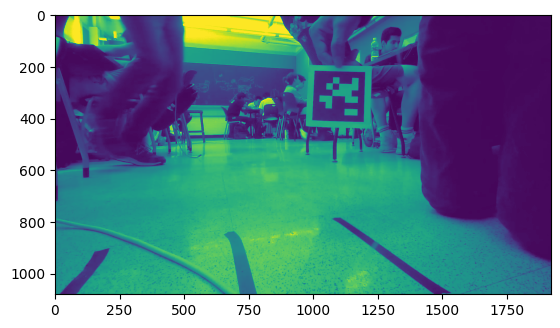

In [63]:

cap = cv2.VideoCapture('AprilTagTest.mkv')
ret, frame = cap.read()

gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

plt.imshow(gray)



In [64]:
cameraMatrix = np.array([ 1060.71, 0, 960, 0, 1060.71, 540, 0, 0, 1]).reshape((3,3))

camera_params = ( cameraMatrix[0,0], cameraMatrix[1,1], cameraMatrix[0,2], cameraMatrix[1,2] )

Tag:  1
(1096.567978083538, 316.6836764538464)
(40.97039342506141, -66.99489706384608)
(40.97039342506141, -66.99489706384608)


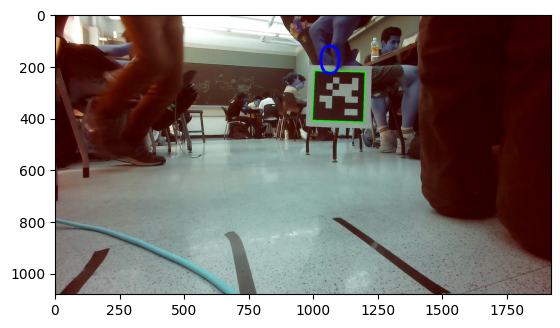

Tag:  1
(1124.6282604153141, 423.6420884829822)
(49.388478124594236, -34.907373455105336)
(49.388478124594236, -34.907373455105336)


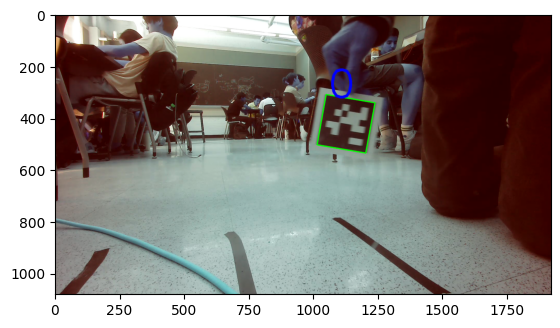

Tag:  1
(840.8931524956985, 244.29556322224732)
(-35.73205425129046, -88.7113310333258)
(-35.73205425129046, -88.7113310333258)


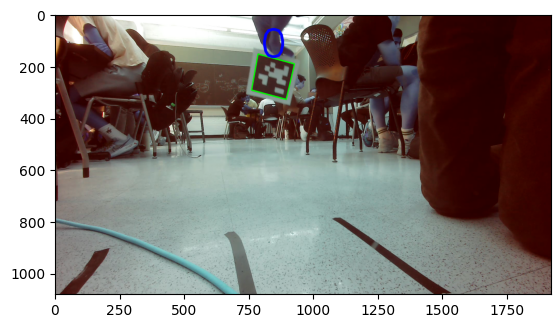

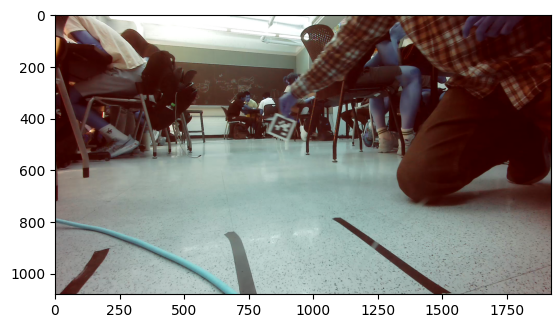

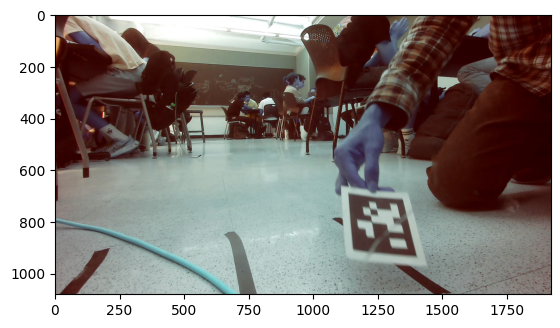

Tag:  1
(1225.4849930282444, 888.0326660722144)
(79.64549790847332, 104.40979982166432)
(79.64549790847332, 104.40979982166432)


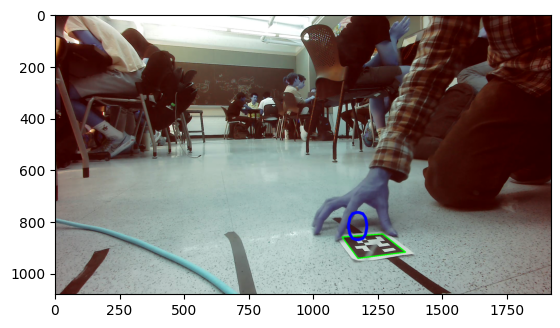

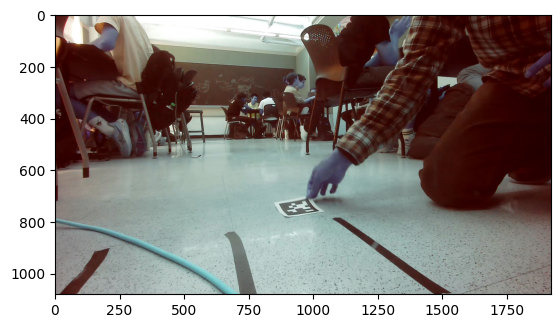

Tag:  1
(590.2319488591958, 524.7805001906053)
(-110.93041534224126, -4.56584994281842)
(-110.93041534224126, -4.56584994281842)


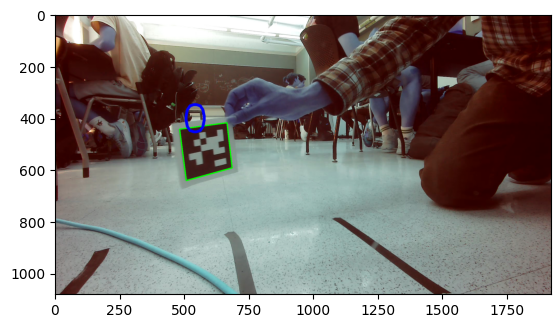

Tag:  1
(1174.175069372729, 370.8757824048417)
(64.2525208118187, -50.73726527854749)
(64.2525208118187, -50.73726527854749)


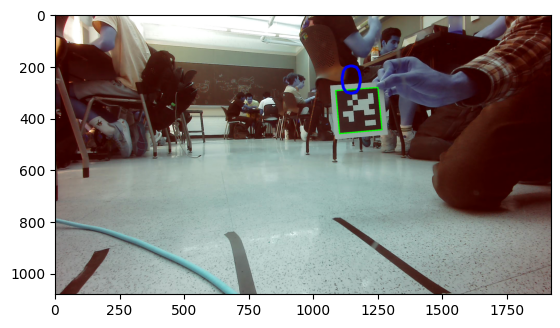

Final output:  (64.2525208118187, -50.73726527854749)


In [65]:
vcap = cv2.VideoCapture("AprilTagTest.mkv")

width = int(vcap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(vcap.get(cv2.CAP_PROP_FRAME_HEIGHT))

output_file = 'april_tags.avi'
fourcc = cv2.VideoWriter_fourcc(*'XVID')
output_video = cv2.VideoWriter(output_file, fourcc, 30, (width, height))

frequency = 100
count = 0

while True:
    ret, img = vcap.read()
    if not ret:
        try:
            print("Final output: ", (x_output, y_output))
            break
        except:
            print("PID was not activated")
            break

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


    if count % frequency == 0:
        #print(img.shape[0], img.shape[1]) #rows, columns
        at_detector = Detector(families='tag36h11',
                    nthreads=1,
                    quad_decimate=1.0,
                    quad_sigma=0.0,
                    refine_edges=1,
                    decode_sharpening=0.25,
                    debug=0)
        cameraMatrix = np.array([ 1060.71, 0, 960, 0, 1060.71, 540, 0, 0, 1]).reshape((3,3))
        camera_params = ( cameraMatrix[0,0], cameraMatrix[1,1], cameraMatrix[0,2], cameraMatrix[1,2] )
        tags = at_detector.detect(gray, True, camera_params, tag_size  = 0.1)
        color_img = img


        y_pid = PID(0.3, 0.0, 0.0, 100)
        x_pid = PID(0.3, 0.0, 0.0, 100)

        i=1
        for tag in tags:
            print("Tag: ", i)
            center_x = sum(coord[0] for coord in tag.corners) / 4
            center_y = sum(coord[1] for coord in tag.corners) / 4
            for idx in range(len(tag.corners)):
                cv2.line(color_img, tuple(tag.corners[idx - 1, :].astype(int)), tuple(tag.corners[idx, :].astype(int)), (0, 255, 0), 3)

            cv2.putText(color_img, str(tag.tag_id),
                        org=(tag.corners[0, 0].astype(int) + 10, tag.corners[0, 1].astype(int) + 10),
                        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                        fontScale=5,
                        color=(0, 0, 255),
                        thickness =  10)
            i+=1
            #depth
            print((tag.center[0], tag.center[1]))

            #displaced_x = tag.pose_t[0][0]
            displaced_x = tag.center[0] - (img.shape[1]/2)
            #print(displaced_x)
            #displaced_depth = tag.pose_t[1][0]
            displaced_y = tag.center[1] - (img.shape[0]/2)
            #print(displaced_y)

            x_output = 0
            y_output = 0

            #while(not isclose(x_output, tag.center[0]) and not isclose(y_output, tag.center[1])):
            displaced_x = tag.center[0] - (img.shape[1]/2)
            x_output = x_pid.update(displaced_x)
            displaced_y = tag.center[1] - (img.shape[0]/2)
            y_output = y_pid.update(displaced_y)
            print((x_output, y_output))

            #at.set_vertical_power(y_output)
            #at.set_lateral_power(x_output)

            
            print((x_output, y_output))

            
        plt.imshow(color_img)
        plt.show()

    count += 1

In [66]:
'''
cap = cv2.VideoCapture('AprilTagTest.mkv')
ret, frame = cap.read()

count=0
frequency=200
while ret:
    if count%frequency==count:
        at_detector = Detector(families='tag36h11',
                            nthreads=1,
                            quad_decimate=1.0,
                            quad_sigma=0.0,
                            refine_edges=1,
                            decode_sharpening=0.25,
                            debug=0)
        tags = at_detector.detect(gray, True, camera_params, tag_size  = 0.1)
        color_img = frame

        #mav = mavutil.mavlink_connection("udpin:0.0.0.0:14550")

        for tag in tags:
            center_x = sum(coord[0] for coord in tag.corners) / 4
            center_y = sum(coord[1] for coord in tag.corners) / 4
            for idx in range(len(tag.corners)):
                cv2.line(color_img, tuple(tag.corners[idx - 1, :].astype(int)), tuple(tag.corners[idx, :].astype(int)), (0, 255, 0), 3)

            cv2.putText(color_img, str(tag.tag_id),
                        org=(tag.corners[0, 0].astype(int) + 10, tag.corners[0, 1].astype(int) + 10),
                        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                        fontScale=5,
                        color=(0, 0, 255),
                        thickness =  10)
            
            (width, length) = np.shape(color_img)

            #depth
            depth_pid = pid.PID(32, 0.5, -1, 20)

            #heading
            heading_pid = pid.PID((25, .0, 5.0, 100))
            
            while True:
                # get pressure from the vehicle
                #msg = mav.recv_match(type="SCALED_PRESSURE", blocking=True)

                desired_depth = center_y
                current_depth = width/2

                print("Depth: ", current_depth)

                # calculate error
                error = desired_depth - current_depth
                print("Error: ", error)

                output = depth_pid.update(error)
                print("Output: ", output)

                # set vertical power
                #atd.set_vertical_power(mav, -output) 

                #-------------------------------------------------------------

                # # get yaw from the vehicle
                # msg = mav.recv_match(type="ATTITUDE", blocking=True)
                # yaw = msg.yaw
                # yaw_rate = msg.yawspeed

                # print("Heading: ", np.rad2deg(yaw))

                desired_lat  = center_x
                fixed_lat  = length/2

                # calculate error
                error = desired_lat - fixed_lat

                print("Error: ", error)


                output = pid.update(error)
                print("Output: ", output)

                # set lateral power
                #atd.set_lateral_power(mav, -output)

            
     
        #plt.imshow(color_img)
        #count+=1







    else:
        print(count)
        ret, frame = cap.read()
'''


'\ncap = cv2.VideoCapture(\'AprilTagTest.mkv\')\nret, frame = cap.read()\n\ncount=0\nfrequency=200\nwhile ret:\n    if count%frequency==count:\n        at_detector = Detector(families=\'tag36h11\',\n                            nthreads=1,\n                            quad_decimate=1.0,\n                            quad_sigma=0.0,\n                            refine_edges=1,\n                            decode_sharpening=0.25,\n                            debug=0)\n        tags = at_detector.detect(gray, True, camera_params, tag_size  = 0.1)\n        color_img = frame\n\n        #mav = mavutil.mavlink_connection("udpin:0.0.0.0:14550")\n\n        for tag in tags:\n            center_x = sum(coord[0] for coord in tag.corners) / 4\n            center_y = sum(coord[1] for coord in tag.corners) / 4\n            for idx in range(len(tag.corners)):\n                cv2.line(color_img, tuple(tag.corners[idx - 1, :].astype(int)), tuple(tag.corners[idx, :].astype(int)), (0, 255, 0), 3)\n\n       